Context
The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market. In this work, we present a recurrent neural network (RNN) and Long Short-Term Memory (LSTM) approach to predict stock market indices.

Content
Data from yahoo.com/finance Netflix historical price 12/16/2015 ~ 12/16/2019 daily price and volume. There are 7 columns; Date, open, high, low, close, volume, adj close (2001, 7) each of stock

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read and prepare the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [ ]:
# Basic EDA Functions
def plot_stock_trends():
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['Open'], label='Open Price', alpha=0.7)
    plt.title('Netflix Stock Price Trends')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['Volume'], label='Volume', color='green')
    plt.title('Trading Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Basic EDA Functions
def analyze_returns():
    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['Daily_Return'], label='Daily Returns')
    plt.title('Daily Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.subplot(2, 1, 2)
    df['Daily_Return'].hist(bins=50)
    plt.title('Distribution of Daily Returns')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Return statistics
    return df['Daily_Return'].describe()

In [ ]:
# Basic EDA Functions
def check_stationarity(data):
    result = adfuller(data['Close'].dropna())
    print('Augmented Dickey-Fuller Test:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

def perform_decomposition(data):
    decomposition = seasonal_decompose(data['Close'], period=20)

    plt.figure(figsize=(15, 12))
    plt.subplot(411)
    plt.plot(data.index, data['Close'])
    plt.title('Original Time Series')
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal')
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual')
    plt.tight_layout()
    plt.show()

Basic Statistics of Stock Prices:
count    1007.000000
mean      226.670159
std       103.203785
min        82.790001
25%       125.514999
50%       198.000000
75%       325.220001
max       418.970001
Name: Close, dtype: float64


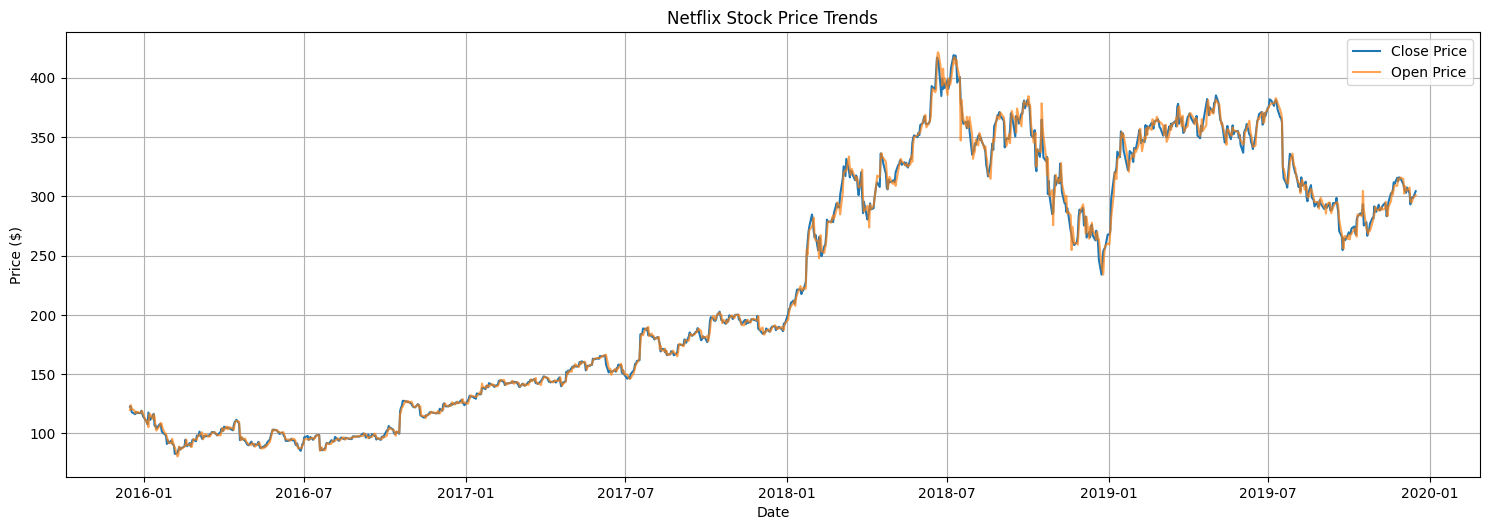

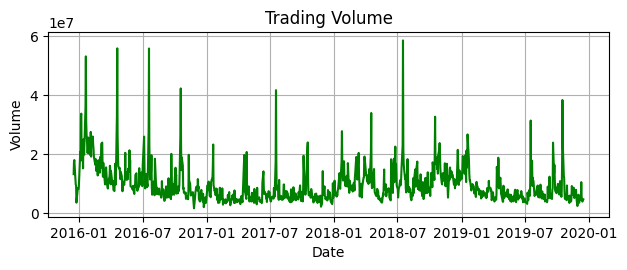

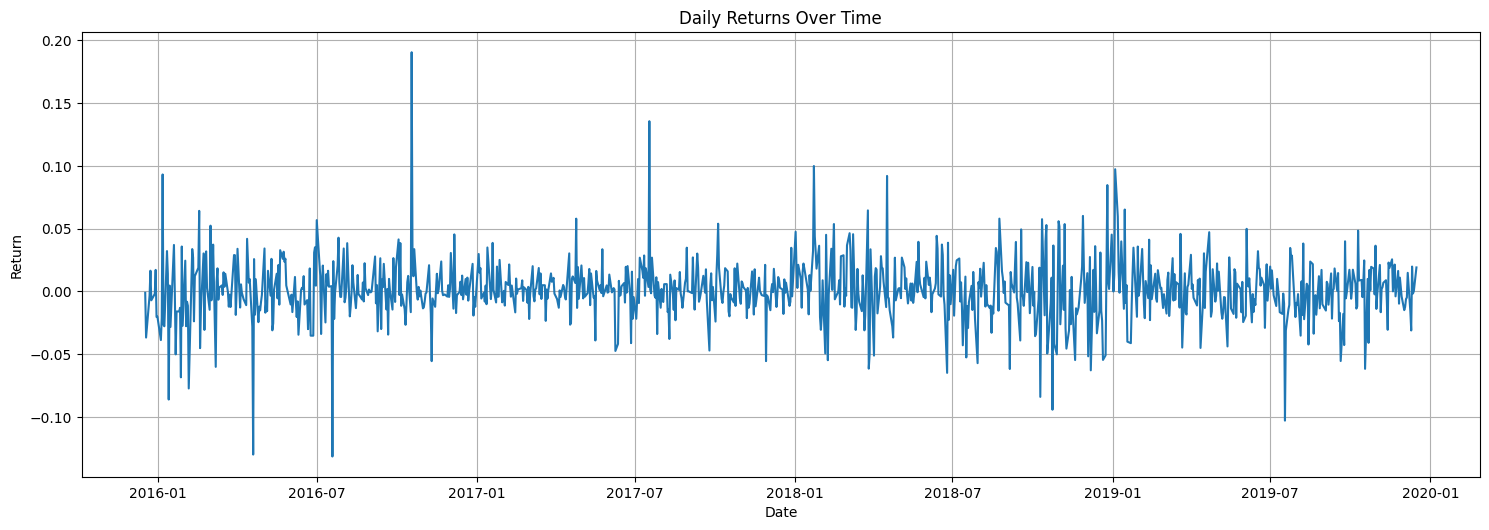

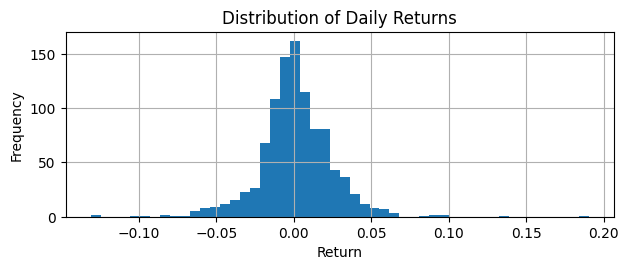


Daily Returns Statistics:
count    1006.000000
mean        0.001205
std         0.024605
min        -0.131262
25%        -0.010851
50%         0.000296
75%         0.014141
max         0.190281
Name: Daily_Return, dtype: float64

Checking for stationarity:
Augmented Dickey-Fuller Test:
ADF Statistic: -1.0759102341969249
p-value: 0.7245824088390834
Critical Values:
	1%: -3.4368995989062348
	5%: -2.8644316780522177
	10%: -2.568309666527279

Performing seasonal decomposition:


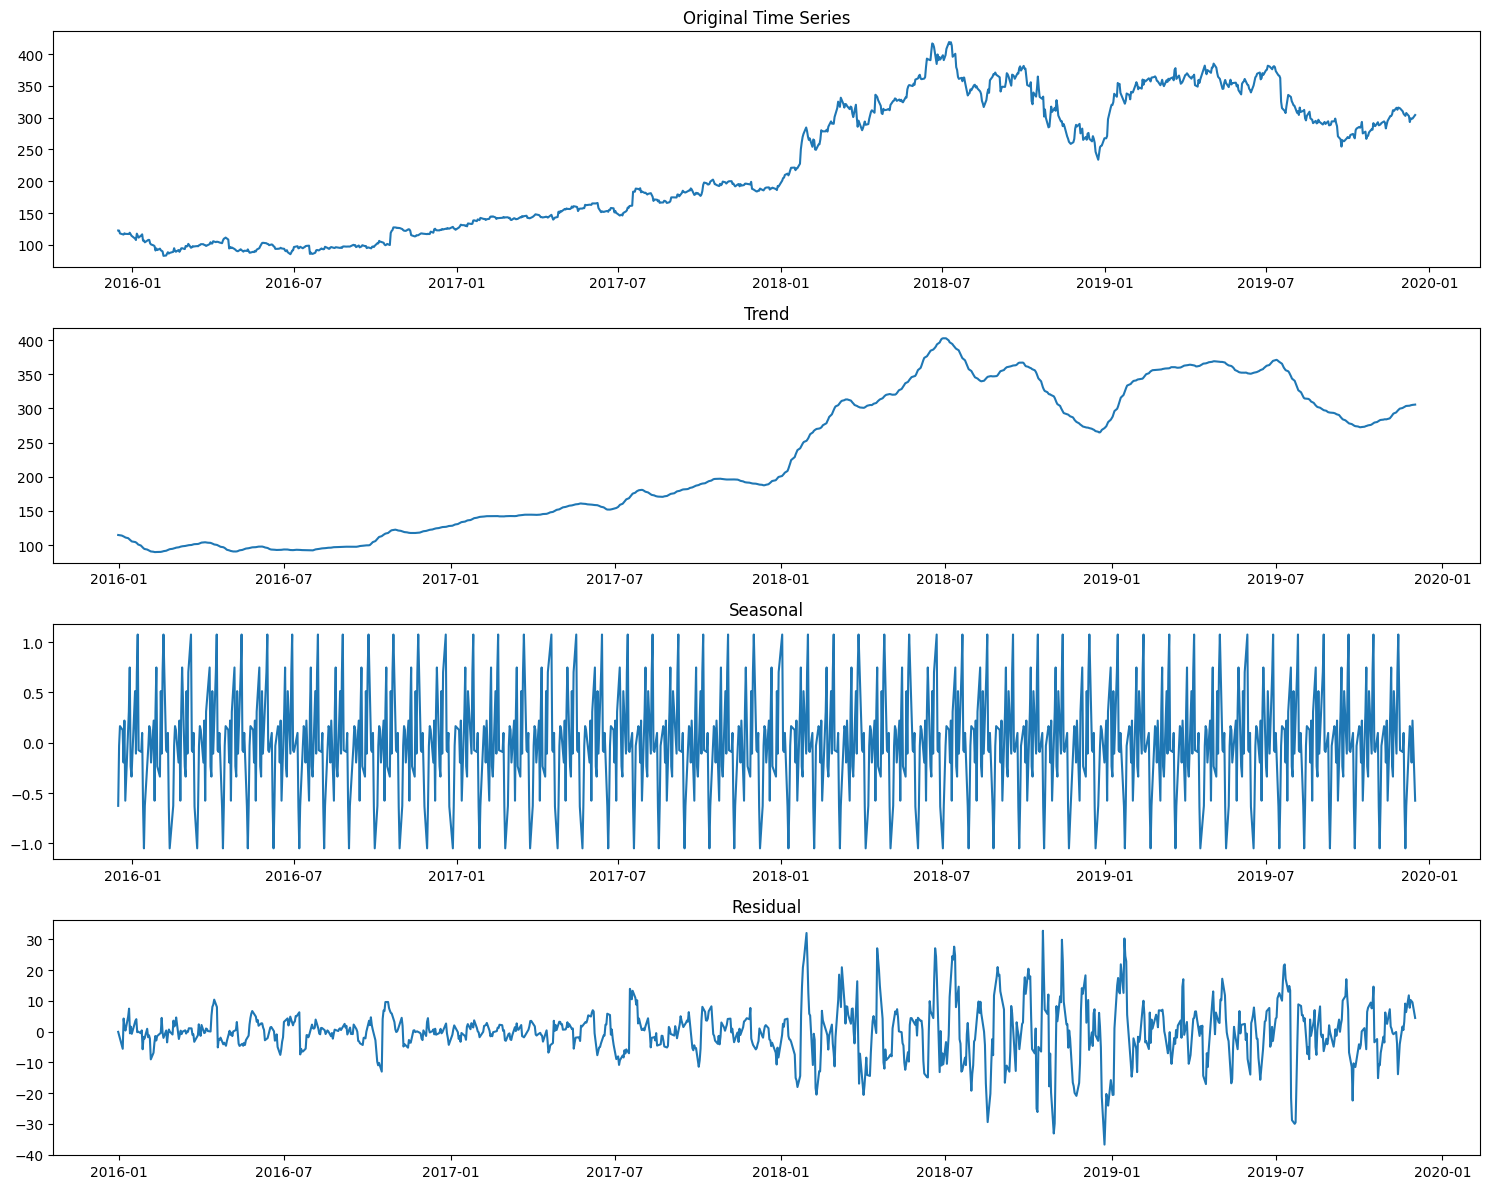

In [ ]:
# Perform EDA
print("Basic Statistics of Stock Prices:")
print(df['Close'].describe())

plot_stock_trends()
returns_stats = analyze_returns()
print("\nDaily Returns Statistics:")
print(returns_stats)

print("\nChecking for stationarity:")
check_stationarity(df)

print("\nPerforming seasonal decomposition:")
perform_decomposition(df)

In [ ]:
# ARIMA Modeling
# Prepare data
df['Close_diff'] = df['Close'].diff()
df_clean = df.dropna()

# Split data
train_size = int(len(df_clean) * 0.8)
train = df_clean[:train_size]
test = df_clean[train_size:]

# Fit ARIMA model
model = ARIMA(train['Close'], order=(1,1,1))
model_fit = model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

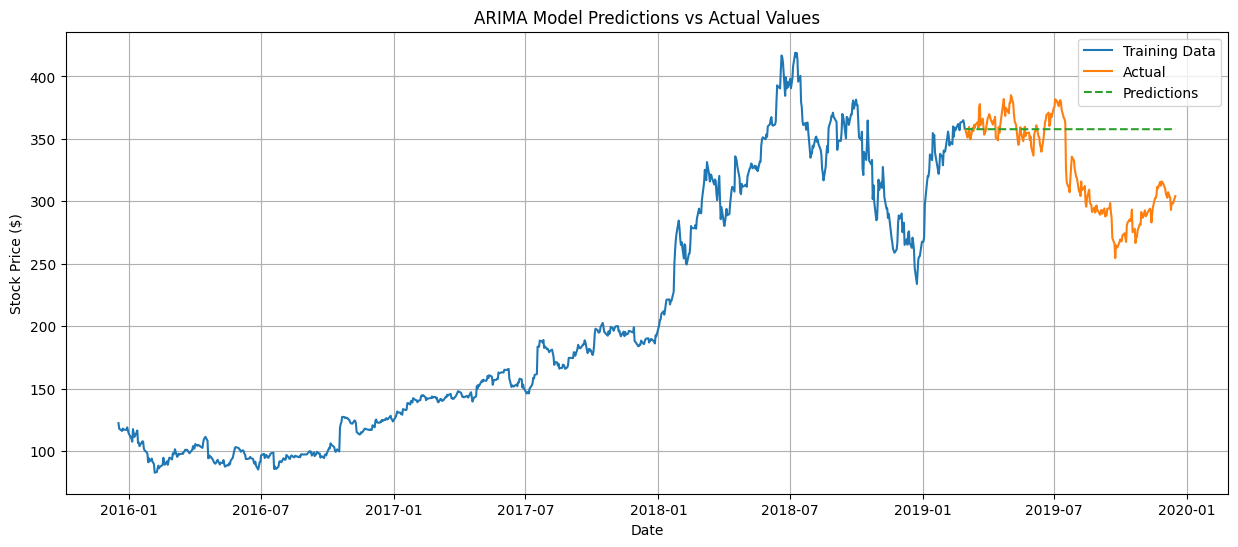

In [ ]:
# Plot predictions
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predictions', linestyle='--')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate error metrics
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Close'], predictions)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Model Performance Metrics:
Mean Squared Error: 2309.01
Root Mean Squared Error: 48.05
Mean Absolute Error: 37.57


In [ ]:
# Calculate additional metrics
def calculate_performance_metrics(actual, predicted):
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    correlation = np.corrcoef(actual, predicted)[0,1]

    return {
        'MAPE': mape,
        'Correlation': correlation
    }

additional_metrics = calculate_performance_metrics(test['Close'].values, predictions)
print("\nAdditional Performance Metrics:")
print(f"Mean Absolute Percentage Error: {additional_metrics['MAPE']:.2f}%")
print(f"Correlation between Actual and Predicted: {additional_metrics['Correlation']:.4f}")


Additional Performance Metrics:
Mean Absolute Percentage Error: 12.67%
Correlation between Actual and Predicted: 0.1129


In [ ]:
stepwise_fit = auto_arima(df['Close'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1007
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3247.217
Date:                Fri, 25 Oct 2024   AIC                           6496.433
Time:                        14:42:41   BIC                           6501.347
Sample:                             0   HQIC                          6498.300
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        37.2579      0.886     42.028      0.000      35.520      38.995
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1091.37
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               9.90   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Arima model after identifying required p, d, q
# Prepare data

df['Close_diff'] = df['Close'].diff()
df_clean = df.dropna()

# Split data
train_size = int(len(df_clean) * 0.8)
train = df_clean[:train_size]
test = df_clean[train_size:]

# Fit ARIMA model
model = ARIMA(train['Close'], order=(0,1,0))
model_fit = model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

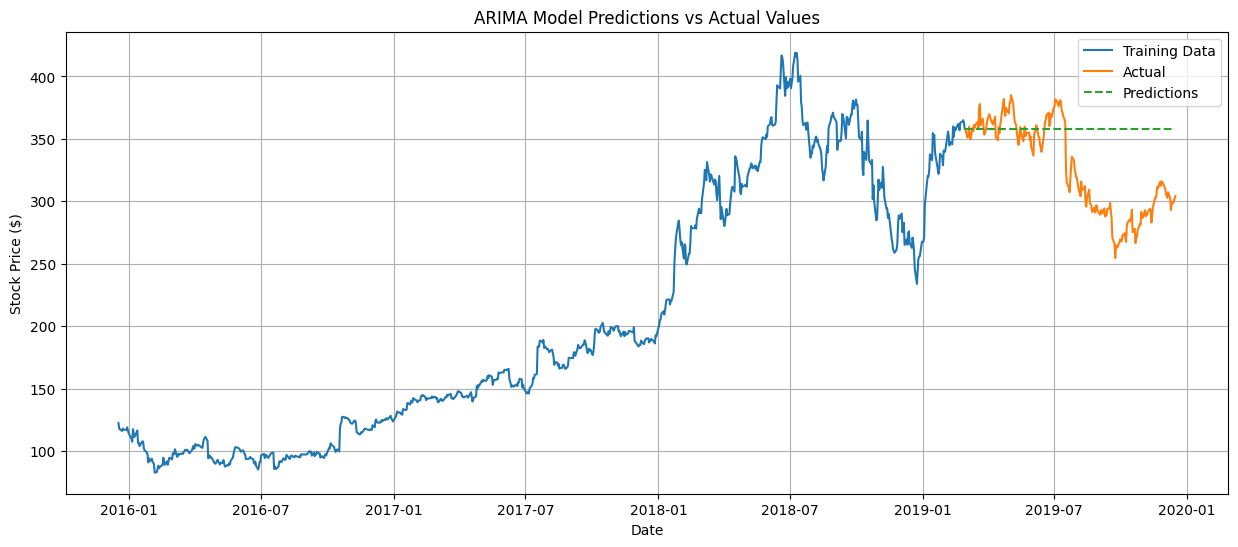

In [ ]:
# Plot predictions
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predictions', linestyle='--')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate error metrics
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Close'], predictions)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Model Performance Metrics:
Mean Squared Error: 2330.78
Root Mean Squared Error: 48.28
Mean Absolute Error: 37.71


In [ ]:
# Calculate additional metrics
def calculate_performance_metrics(actual, predicted):
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    correlation = np.corrcoef(actual, predicted)[0,1]

    return {
        'MAPE': mape,
        'Correlation': correlation
    }

additional_metrics = calculate_performance_metrics(test['Close'].values, predictions)
print("\nAdditional Performance Metrics:")
print(f"Mean Absolute Percentage Error: {additional_metrics['MAPE']:.2f}%")
print(f"Correlation between Actual and Predicted: {additional_metrics['Correlation']:.4f}")


Additional Performance Metrics:
Mean Absolute Percentage Error: 12.72%
Correlation between Actual and Predicted: 0.0000



Analyzing with 70.0% training data:
Finding best SARIMA parameters...
Best SARIMA parameters - Regular: (0, 1, 0), Seasonal: (0, 1, 1, 12)

Performance Metrics for 70.0% split:
RMSE: 142.91
MAE: 128.34
MAPE: nan%


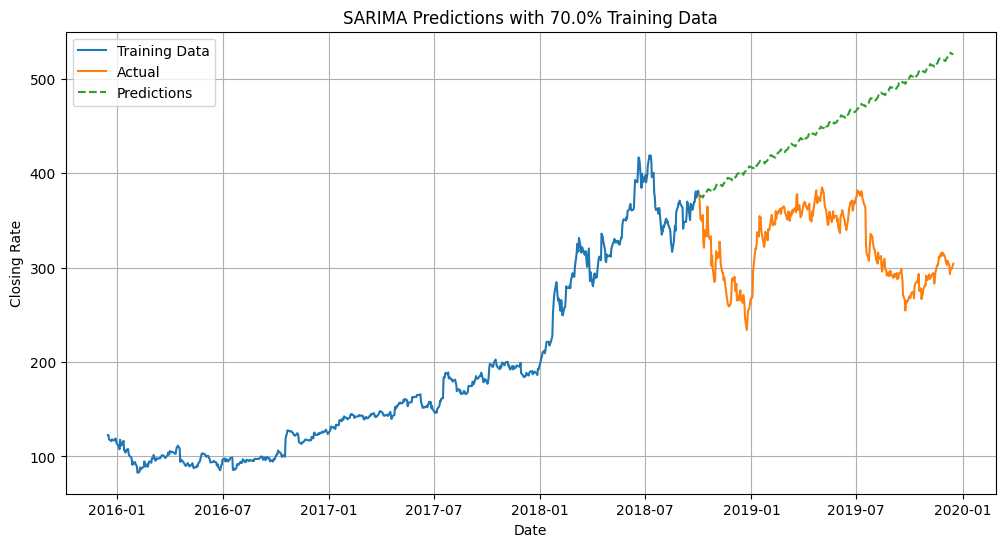


Analyzing with 80.0% training data:
Finding best SARIMA parameters...
Best SARIMA parameters - Regular: (0, 1, 0), Seasonal: (0, 1, 1, 12)

Performance Metrics for 80.0% split:
RMSE: 85.56
MAE: 67.31
MAPE: nan%


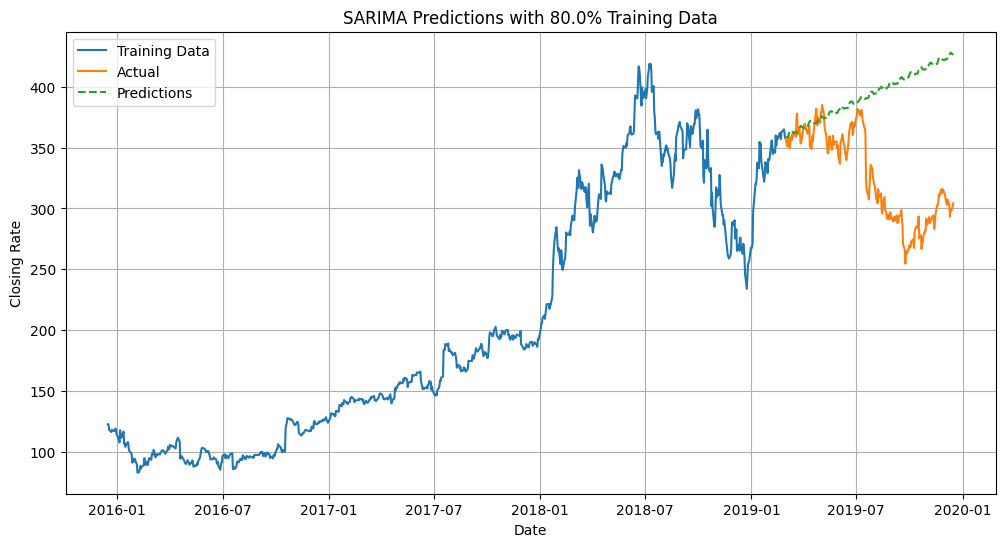


Analyzing with 90.0% training data:
Finding best SARIMA parameters...
Best SARIMA parameters - Regular: (0, 1, 0), Seasonal: (0, 1, 1, 12)

Performance Metrics for 90.0% split:
RMSE: 37.68
MAE: 34.04
MAPE: nan%


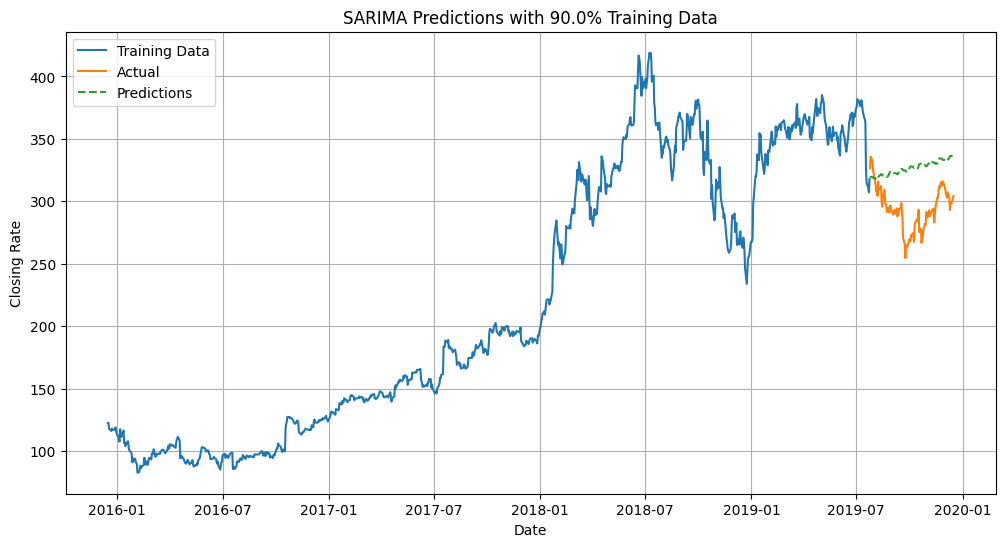


Analyzing with 95.0% training data:
Finding best SARIMA parameters...
Best SARIMA parameters - Regular: (0, 1, 0), Seasonal: (0, 1, 1, 12)

Performance Metrics for 95.0% split:
RMSE: 27.91
MAE: 24.78
MAPE: nan%


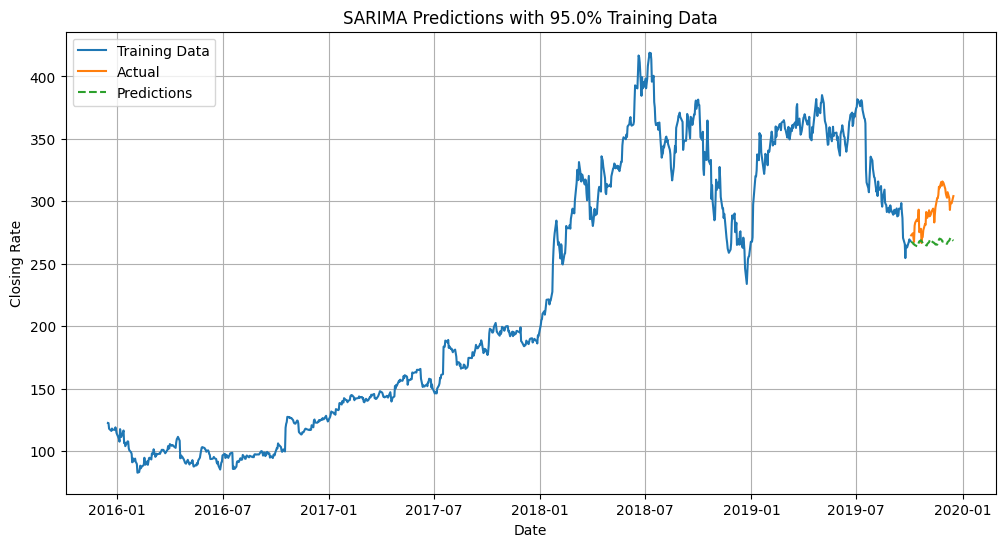


Comparison of different train-test splits:
   split        rmse         mae  mape
0   0.70  142.913180  128.338164   NaN
1   0.80   85.557473   67.313469   NaN
2   0.90   37.680435   34.036027   NaN
3   0.95   27.913537   24.778648   NaN


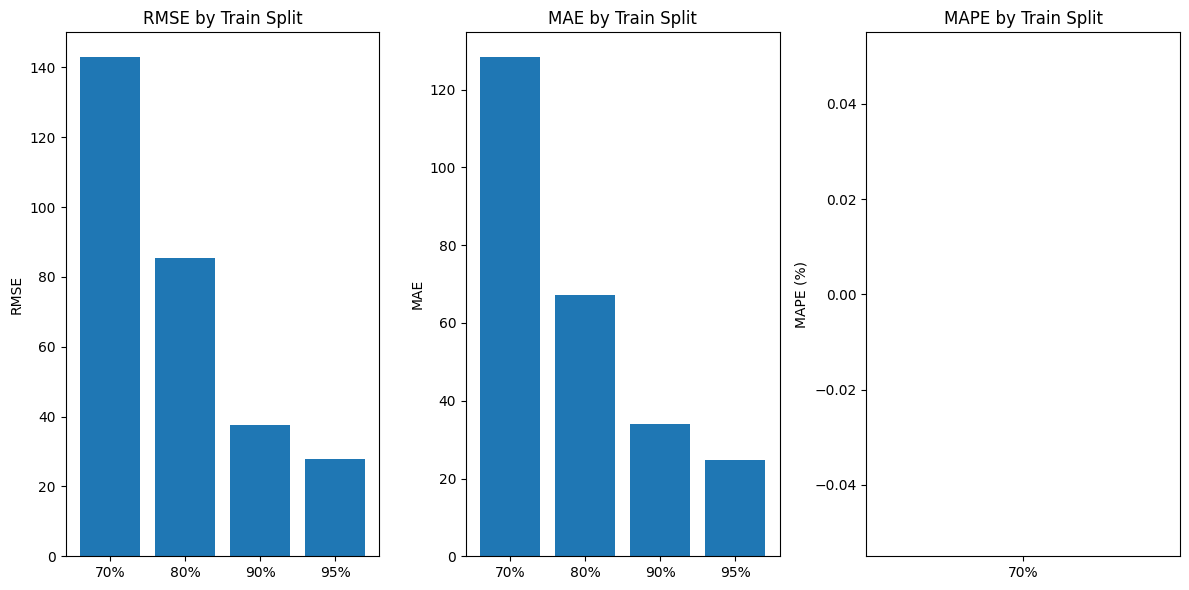


Best performing model:
Train-test split: 95.0%
SARIMA parameters: (0, 1, 0)
Seasonal parameters: (0, 1, 1, 12)


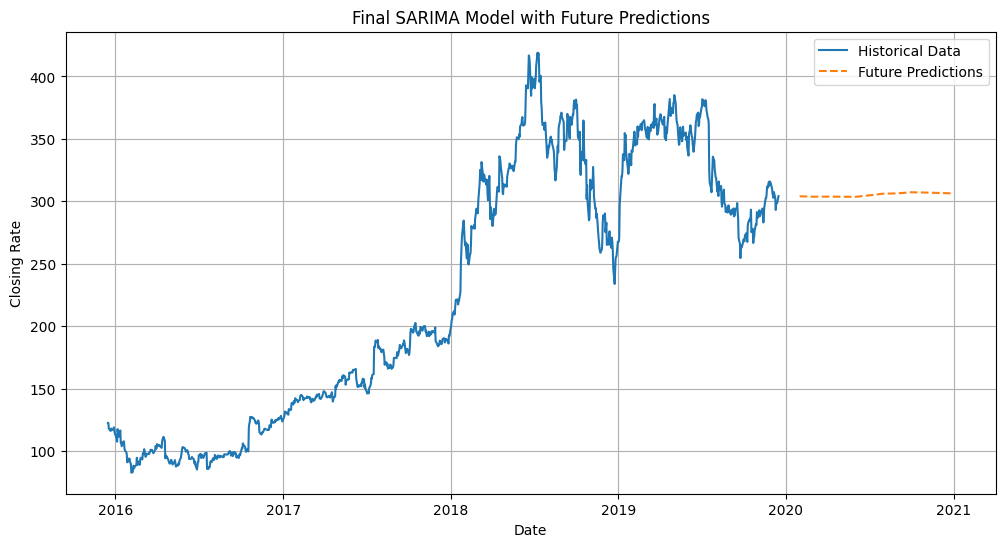

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

# Read and prepare the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Function to evaluate SARIMA models
def evaluate_sarima_model(data, order, seasonal_order):
    try:
        model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
        results = model.fit(disp=False)
        return results.aic
    except:
        return float("inf")

# Function to find best SARIMA parameters
def find_best_sarima_params(data):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    best_aic = float("inf")
    best_params = None
    best_seasonal_params = None

    print("Finding best SARIMA parameters...")
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            aic = evaluate_sarima_model(data, param, param_seasonal)
            if aic < best_aic:
                best_aic = aic
                best_params = param
                best_seasonal_params = param_seasonal

    return best_params, best_seasonal_params

# Function to evaluate model performance
def evaluate_predictions(actual, predictions, split_name):
    mse = mean_squared_error(actual, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predictions)
    mape = np.mean(np.abs((actual - predictions) / actual)) * 100

    print(f"\nPerformance Metrics for {split_name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")

    return rmse, mae, mape

# Function to plot results
def plot_predictions(train, test, predictions, title):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['Close'], label='Training Data')
    plt.plot(test.index, test['Close'], label='Actual')
    plt.plot(test.index, predictions, label='Predictions', linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform analysis with different train-test splits
train_test_splits = [0.7, 0.8, 0.9,0.95]
results = []

for split in train_test_splits:
    print(f"\nAnalyzing with {split*100}% training data:")

    # Split data
    train_size = int(len(df) * split)
    train = df[:train_size]
    test = df[train_size:]

    # Find best parameters
    best_params, best_seasonal_params = find_best_sarima_params(train['Close'])
    print(f"Best SARIMA parameters - Regular: {best_params}, Seasonal: {best_seasonal_params}")

    # Fit model with best parameters
    model = SARIMAX(train['Close'],
                    order=best_params,
                    seasonal_order=best_seasonal_params)
    model_fit = model.fit(disp=False)

    # Make predictions
    predictions = model_fit.forecast(steps=len(test))

    # Evaluate and store results
    rmse, mae, mape = evaluate_predictions(test['Close'], predictions, f"{split*100}% split")
    results.append({
        'split': split,
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'params': best_params,
        'seasonal_params': best_seasonal_params
    })

    # Plot results
    plot_predictions(train, test, predictions,
                    f'SARIMA Predictions with {split*100}% Training Data')

# Compare results across different splits
results_df = pd.DataFrame(results)
print("\nComparison of different train-test splits:")
print(results_df[['split', 'rmse', 'mae', 'mape']])

# Plot error metrics comparison
plt.figure(figsize=(12, 6))
splits = [str(int(split*100))+'%' for split in train_test_splits]

plt.subplot(131)
plt.bar(splits, results_df['rmse'])
plt.title('RMSE by Train Split')
plt.ylabel('RMSE')

plt.subplot(132)
plt.bar(splits, results_df['mae'])
plt.title('MAE by Train Split')
plt.ylabel('MAE')

plt.subplot(133)
plt.bar(splits, results_df['mape'])
plt.title('MAPE by Train Split')
plt.ylabel('MAPE (%)')

plt.tight_layout()
plt.show()

# Final model with best split (based on results)
best_split_idx = results_df['rmse'].idxmin()
best_split = results_df.iloc[best_split_idx]['split']
best_params = results_df.iloc[best_split_idx]['params']
best_seasonal_params = results_df.iloc[best_split_idx]['seasonal_params']

print(f"\nBest performing model:")
print(f"Train-test split: {best_split*100}%")
print(f"SARIMA parameters: {best_params}")
print(f"Seasonal parameters: {best_seasonal_params}")

# Fit final model with best parameters
train_size = int(len(df) * best_split)
train = df[:train_size]
test = df[train_size:]

final_model = SARIMAX(df['Close'],
                     order=best_params,
                     seasonal_order=best_seasonal_params)
final_model_fit = final_model.fit(disp=False)

# Make future predictions
future_steps = 12  # Predict one year ahead
future_predictions = final_model_fit.forecast(steps=future_steps)

# Plot final results including future predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Data')
future_dates = pd.date_range(start=df.index[-1], periods=future_steps+1, freq='M')[1:]
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Final SARIMA Model with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Rate')
plt.legend()
plt.grid(True)
plt.show()